<a href="https://colab.research.google.com/github/GraceHerchenroder/Neuro265/blob/main/homework/coding_homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding Homework #4

**Instructions**

1. Make a *Markdown Cell* that contains the following information:
- Your name (small header)
- The name of this class (italicized)
- The date (bolded)

2. Create a *Code Cell* that imports relevant modules - specifically, <code>pandas as pd</code>, <code>matplotlib.pyplot as plt</code>, and <code>scipy.stats as stats</code>.

3. For this assignment, you'll be using the <code>patch_seq_expanded.csv</code> file located in our class GitHub repo. Create a *Code Cell* that loads this file in as a <code>Pandas dataFrame</code> called <code>patch_seq</code>.

4. In a new *Code Cell*, using the <code>df.plot</code> method from the <code>pandas</code> module, make a bar graph that displays the value counts (how many observations) from the "Marker" column of your <code>patch_seq</code> variable. Label your x and y-axes.

5. In a new *Code Cell*, repeat step 4, but make a pie chart instead of a bar graph.

6. In a new *Code Cell*, use a <code>for</code> loop to make a scatter plot of the "ISI" (on the x-axis) and "Fast_Trough" (on the y-axis) values in your <code>patch_seq</code> dataframe. Your loop should make data points from "Sst" neurons <font color = 'red'>red</font>, and data points from "Pvalb" neurons <font color = 'blue'>blue</font>.

7. In a new *Code Cell*, create a <code>function</code> called <code>patchScatter()</code> that will output the scatter plot created in step 6 when you call it. Don't forget to tell it to show your scatter plot!

8. In a new *Code Cell*, return the mean, standard deviation, and range of the "Fast_Trough" column for "Sst" neurons and "Pvalb" neurons. You can do this with the <code>pandas</code> method <code>describe</code>, like so:

<code>patch_seq.groupby('Marker')['Fast_Trough'].describe()</code>

9. In a new *Markdown Cell*, describe the difference in means between "Sst" neurons and "Pvalb" neurons. Which group has a more negative undershoot following an action potential?

10. In a new *Code Cell*, return the skewness of the "Fast_Trough" column for "Sst" neurons and "Pvalb" neurons. You can do this with the <code>pandas</code> method <code>skew</code> (follow the syntax in step 8 to apply this method to <code>patch_seq</code>).

11. In a new *Markdown Cell*, interpret the results of your skewness test. Generally, values >0.5, or <-0.5, indicate a skewed distribution, while values between -0.5 and 0.5 indicate a normal distribution.

12. In a new *Code Cell*, repeat step 10 for the "ISI" column of <code>patch_seq</code>.

13. In a new *Markdown Cell*, repeat step 11 for the "ISI" column of <code>patch_seq</code>.

14. Finally, in a new *Code Cell*, let's perform a t-test to see if our "Fast_Trough" and "ISI" values differ between "Sst" and "Pvalb" neurons. To do this for our "Fast_Trough" values, we should first isolate each group and make each of them into a separate variable. An example of how to do this for "Sst" neurons is below:

<code>sst_neurons = patch_seq[patch_seq['Marker']=='Sst']</code>

Use the same code to create another variable called <code>pvalb_neurons</code>. Once you've made your two variables, perform an independent-samples t-test to compare "Fast_Trough" values between the two groups:

<code>stats.ttest_ind(sst_neurons['Fast_Trough'], pvalb_neurons['Fast_Trough'])</code>.

15. In a *Markdown Cell*, describe the results of your t-test. Does the undershoot voltage significantly differ betwen the two groups?

16. In a new *Code Cell*, repeat step 14 for "ISI". You won't need to create new <code>sst_neurons</code> and <code>pvalb_neurons</code> variables - you'll just need to run a new t-test.

17. In a new *Markdown Cell*, repeat step 15 for the results of your new t-test.

18. Make sure to put a <code>#</code> in each *Code Cell* to describe what it does.

19. Save a copy of this notebook to your GitHub repo with the title <code>coding_homework_4.ipynb</code>.




### Grace Herchenroder
*Neuro265: Intro to Neural Data Analysis*

**March 8th 2024**

In [3]:
# Import relevant modules
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [4]:
# Load file in as a Pandas dataFrame called patch_seq

url = 'https://raw.githubusercontent.com/hallockh/neur_265/main/data/patch_seq_expanded.csv'
patch_seq = pd.read_csv(url)

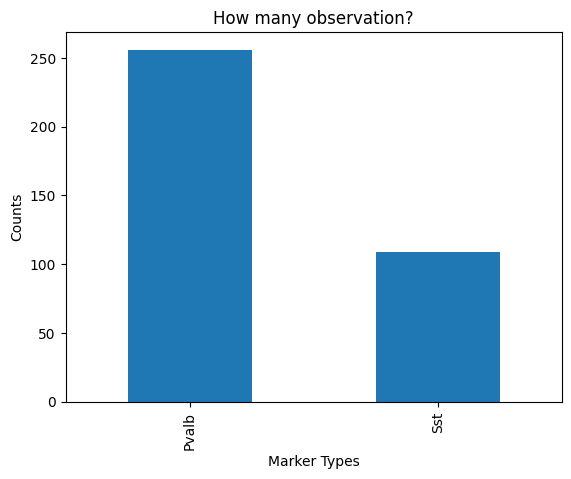

In [19]:
#Create bar graph of marker type counts with labels

counts_patch = patch_seq['Marker'].value_counts()
counts_patch.plot(kind = 'bar')
plt.ylabel('Counts')
plt.xlabel('Marker Types')
plt.title('How many observation?')
plt.show()

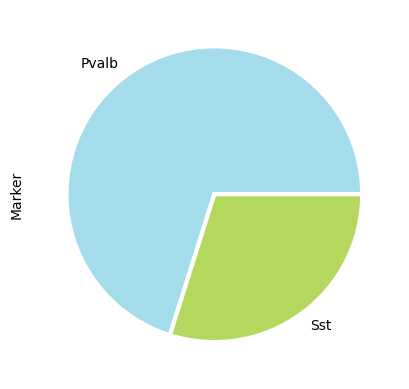

In [22]:
# Creating a pie chart of previous data
counts_patch.plot(kind = 'pie', wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, colors = ['#a4dceb', '#b4d75d'])
plt.show()

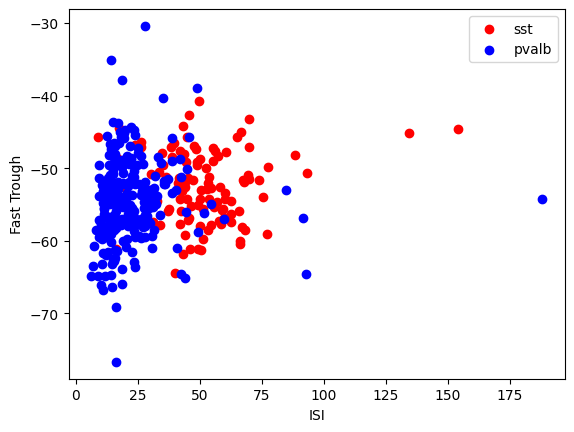

In [39]:
# Creating color coded scatter plot

ISI_patch = patch_seq['ISI']
Fast_Trough = patch_seq['Fast_Trough']
marker_patch = patch_seq['Marker']
legend_sst = True
legend_pvalb = True

for i in range(len(ISI_patch)):
  if marker_patch[i] == 'Sst':
    if legend_sst:
      plt.scatter(ISI_patch[i], Fast_Trough[i], color = 'red', label = 'sst') #creates legend for sst
      legend_sst = False
      continue
    plt.scatter(ISI_patch[i], Fast_Trough[i], color = 'red')
  elif marker_patch[i] == 'Pvalb':
    if legend_pvalb:
      plt.scatter(ISI_patch[i], Fast_Trough[i], color = 'blue', label = 'pvalb') # creates legend for pvalb
      legend_pvalb = False
      continue
    plt.scatter(ISI_patch[i], Fast_Trough[i], color = 'blue')

plt.xlabel('ISI')
plt.ylabel('Fast Trough')
plt.legend()
plt.show()

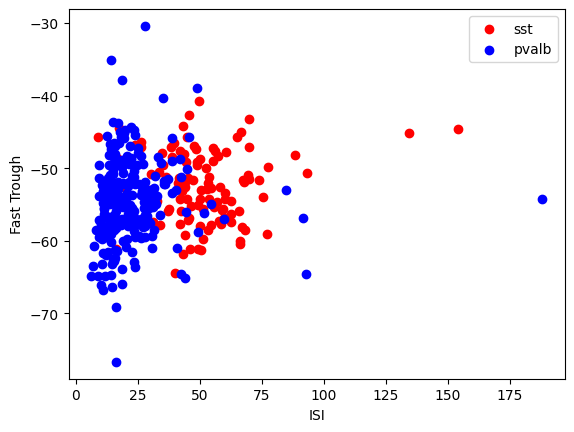

In [43]:
# Creating a function from previous code

def patchScatter(patch_seq): #takes patch_seq as an input
  ISI_patch = patch_seq['ISI']
  Fast_Trough = patch_seq['Fast_Trough']
  marker_patch = patch_seq['Marker']
  legend_sst = True
  legend_pvalb = True

  for i in range(len(ISI_patch)):
    if marker_patch[i] == 'Sst':
      if legend_sst:
        plt.scatter(ISI_patch[i], Fast_Trough[i], color = 'red', label = 'sst')
        legend_sst = False
        continue
      plt.scatter(ISI_patch[i], Fast_Trough[i], color = 'red')
    elif marker_patch[i] == 'Pvalb':
      if legend_pvalb:
        plt.scatter(ISI_patch[i], Fast_Trough[i], color = 'blue', label = 'pvalb')
        legend_pvalb = False
        continue
      plt.scatter(ISI_patch[i], Fast_Trough[i], color = 'blue')

  plt.xlabel('ISI')
  plt.ylabel('Fast Trough')
  plt.legend()
  plt.show()

patchScatter(patch_seq) #verification of function

In [45]:
# Return the mean, standard deviation, and range of the "Fast_Trough" column for "Sst" neurons and "Pvalb" neurons

patch_seq.groupby('Marker')['Fast_Trough'].describe()

,count,mean,std,min,25%,50%,75%,max
Marker,,,,,,,,
Pvalb,256.0,-54.548074,5.870670,-76.687508,-57.914063,-54.490629,-51.364065,-30.406252
Sst,109.0,-52.514968,4.958103,-64.375008,-55.931252,-52.568752,-48.500000,-40.781254


## Sst vs Pvalb Neurons

The **pvalb** neurons have a more negative undershoot following the action potential as the mean is lower than that of the sst neurons. However, the difference between the two means is about 2 mV and considering their standard deviations they may not be very significantly different. This is also shown as the maximum for the **sst** neurons is more negative than that of the pvalb neurons. Therefore, it is difficult to determine which is more likely to have a more negative undershoot as they are within a close range to each other and the Pvalb has a higher number of counts so it has a more well rounded depiction of what may occur in future action potentials.

In [48]:
# Determining the level of skew of the pvalb and sst neuron's fast trough

patch_seq.groupby('Marker')['Fast_Trough'].skew()

Marker
Pvalb    0.19536
Sst      0.00125
Name: Fast_Trough, dtype: float64

### Skew Test: Fast Trough

Considering that typically values above 0.5 or below -0.5 are considered skewed, neither of the markers are skewed datasets. However, the *pvalb* neurons are slightly more skewed than the *sst* neurons as it shows a higher number which indicates futher from a normal distribution.

In [49]:
# Determining the level of skew of the pvalb and sst neuron's ISI values

patch_seq.groupby('Marker')['ISI'].skew()

Marker
Pvalb    5.596386
Sst      1.857850
Name: ISI, dtype: float64

### Skew Test: ISI

The results show that both the *Pvalb* and *Sst* neurons' ISI values are greatly skewed as they are each over 1 count above what is considered skewed. In relation to each other, the *Pvalb* neruons are more skewed than the *Sst* neurons as it is about 3 times larger.

In [52]:
# Perform a t-test for the fast trough values of sst and pvalb neurons

sst_neurons = patch_seq[patch_seq['Marker']=='Sst']
pvalb_neurons = patch_seq[patch_seq['Marker']=='Pvalb']

print(stats.ttest_ind(sst_neurons['Fast_Trough'], pvalb_neurons['Fast_Trough']))

TtestResult(statistic=3.1660773376899147, pvalue=0.0016757984214133585, df=363.0)


### T-Test: Fast Trough

The fast trough difference between *pvalb* and *sst* neurons is considered statistically significant as the pvalues is less than 0.05 (pvalue = 0.002). This means that the fast trough/undershoot values are statistically different across the two neuron types.

In [57]:
# Perform a t-test for the ISI values of sst and pvalb neurons
# Eliminate N/A values from dataframes
sst_neurons = sst_neurons.dropna()
pvalb_neurons = pvalb_neurons.dropna()

print(stats.ttest_ind(sst_neurons['ISI'], pvalb_neurons['ISI']))

TtestResult(statistic=14.643966775010774, pvalue=2.694292788633572e-38, df=354.0)


### T-Test: ISI

The difference between ISI values of *pvalb* and *sst* neurons is considered statisitcally significant as the pvalue is greatly less than 0.05. The pvalue in this case is multiplied by 10 to the -38th power making it extremely small. Logically, this appears reasonable in comparison with the previously done skew test.